Loan Prediction Using machine learning
TODO:
1. We have to get information about data and do the changes that are required.
2. Meanwhile we will visualize the data on different aspects.
3. Finsally we will apply the machine learning algorithms.


#DATA CLEANING AND PREPARATION


In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chiragkumarprajapat
Your Kaggle Key: ··········


100%|██████████| 12.6k/12.6k [00:00<00:00, 1.90MB/s]

In [101]:
data_file="./loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv"

In [102]:
import pandas as pd
df=pd.read_csv(data_file)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [103]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
#can see some of column contains null values. Let's have a greater look here.
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
#let drop the null values in the data
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [106]:
# We are making a different dataframe for whose loan status is showing negative. 
df1=df[df['Loan_Status']=='N']
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [107]:
# We are making a different dataframe for whose loan status is showing positive. 
df2=df[df['Loan_Status']=='Y']
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


#DATA VISUALIZATION
Now here we will visualize the data one basis of certain columns aspects:
* marital status
* education
* number of dependents 
* employments


In [108]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

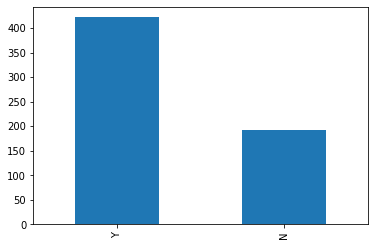

In [109]:
#let visualise the target column first
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

Inference: We can see that we have around more than 400 people who have loan status "yes" and around 200 we have people whose loan status is "no".

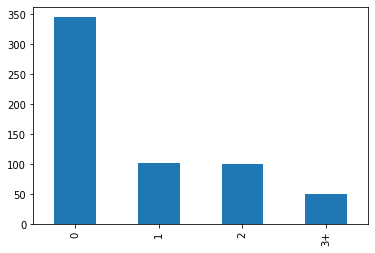

In [138]:
df['Dependents'].value_counts().plot(kind='bar')
plt.show()

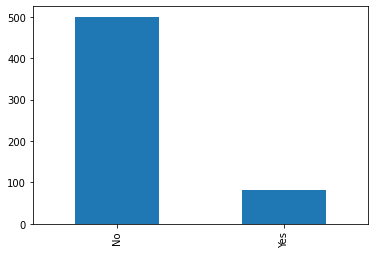

In [140]:
df['Self_Employed'].value_counts().plot(kind='bar')
plt.show()
#around 500 people are not employed and less than 100 people are only employed

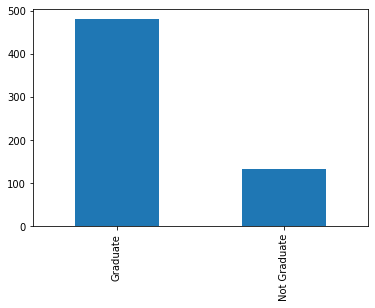

In [119]:
df['Education'].value_counts().plot(kind='bar')
plt.show()
#Almost 450 people are gratuated and around 120 are undergraduate

In [ ]:
df['E'].value_counts().plot(kind='bar')
plt.show()

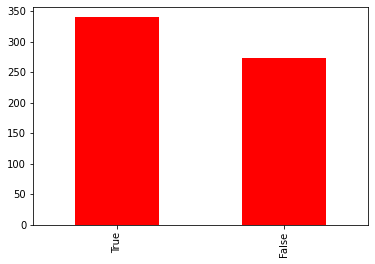

In [135]:
((df['Education']=='Graduate') & (df['Loan_Status']=='Y') ).value_counts().plot(kind='bar',color='red')
plt.show()

Infernece : pepole who are graduated we have around 320 pepole who have loan approval.

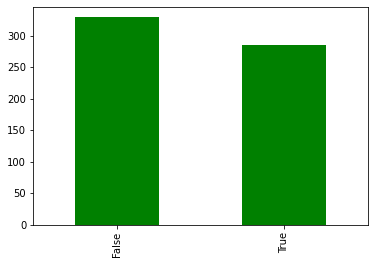

In [137]:
((df['Married']=='Yes') & (df['Loan_Status']=='Y')).value_counts().plot(kind='bar',color="green")
plt.show()

Inference:pepole who are married we have around 350 pepole who have loan approval.

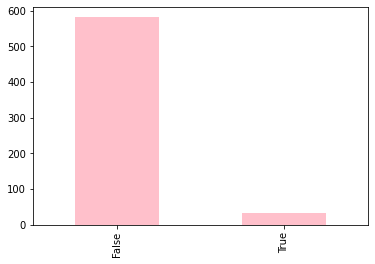

In [143]:
((df['Married']=='Yes') & (df['Loan_Status']=='Y')&(df['Education']=='Graduate')&(df['Self_Employed']=='Yes')).value_counts().plot(kind='bar',color="pink")
plt.show()

So, here we can see that only around 50 people are there who are married, graduated and self employed and have loan approval.


Let me take you to detail analysis


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


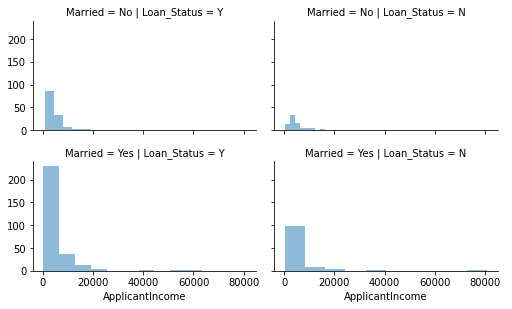

In [148]:
grid = sns.FacetGrid(df, row='Married', col='Loan_Status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


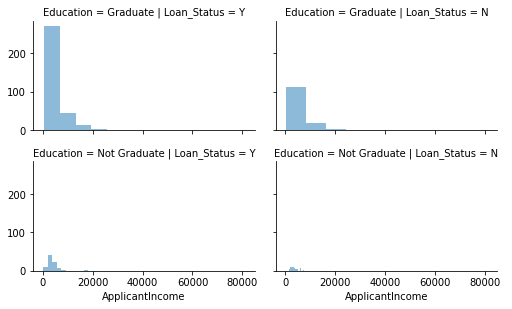

In [149]:
grid = sns.FacetGrid(df, row='Education', col='Loan_Status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

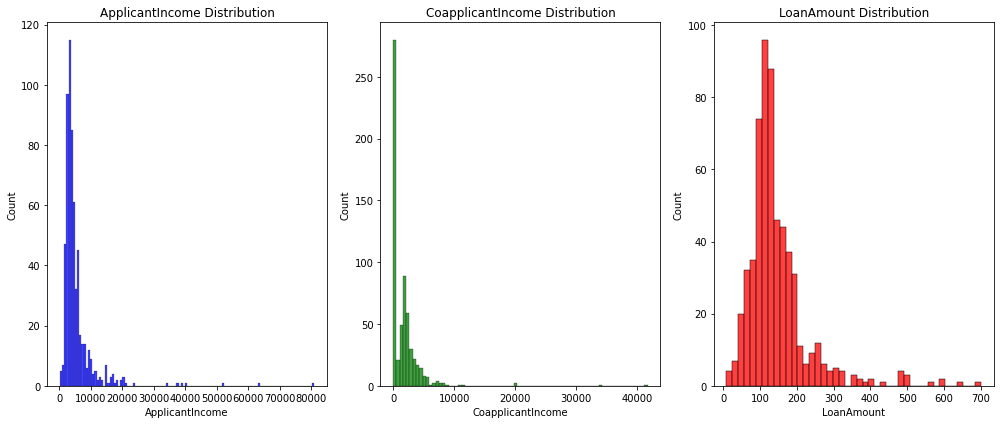

<Figure size 432x288 with 0 Axes>

In [155]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.histplot(df['ApplicantIncome'], color = "blue", ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('Count')

sns.histplot(df['CoapplicantIncome'], color = "green", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('Count')

sns.histplot(df['LoanAmount'],color = "red", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

Now, we will go for correlation matrix

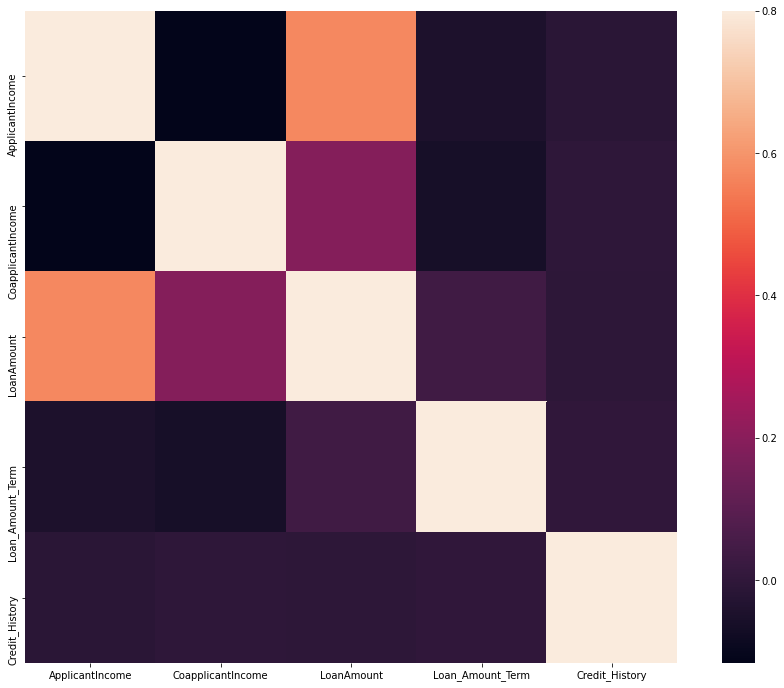

In [158]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);


#MACHINE LEARNING MODELS
Since, data is classification dataset we will try to use all the algorithm related to classification.


1. Logistic regression

In [182]:
df.drop('Loan_ID',inplace=True,axis=1)

In [217]:
#converting categorical to numerical values
df['Married']=pd.factorize(df['Married'])[0]
df['Self_Employed']=pd.factorize(df['Self_Employed'])[0]
df['Education']=pd.factorize(df['Education'])[0]
df['Property_Area']=pd.factorize(df['Property_Area'])[0]
df['Gender']=pd.factorize(df['Gender'])[0]
df['Loan_Status']=pd.factorize(df['Loan_Status'])[0]
df.fillna(0)
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,0,1,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,0,1,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0
5,0,1,0,1,5417,4196.0,267.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,2900,0.0,71.0,360.0,1.0,1,0
610,0,1,0,0,4106,0.0,40.0,180.0,1.0,1,0
611,0,1,0,0,8072,240.0,253.0,360.0,1.0,0,0
612,0,1,0,0,7583,0.0,187.0,360.0,1.0,0,0


In [218]:
train_X=df.iloc[:614,]
train_y=df['Loan_Status']
X_test=df.iloc[614:,]
seed=7

In [219]:
#import train_test_split and performin the same on dataset
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [220]:
#importing the machne learning classification algorithm libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [221]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [222]:

seed=7
scoring='accuracy'
result=[]
names=[]

In [223]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

logreg 1.000000 0.000000
tree 1.000000 0.000000
lda 0.807628 0.082745


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


svc 0.688846 0.104276
knn 0.648718 0.081238
nb 0.987500 0.020156


In [224]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

1.0
[[93  0]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        40

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
